In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML_CSV/MLS.csv')
df.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01


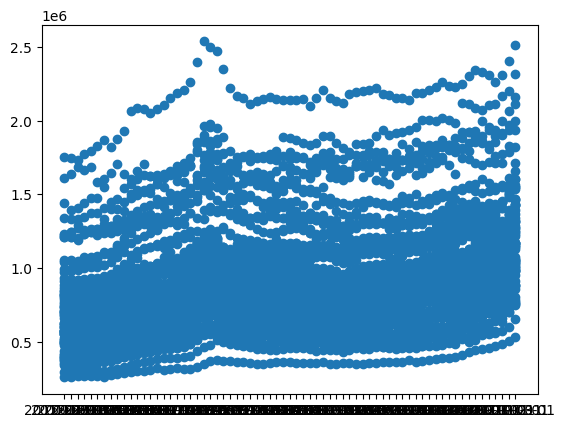

In [ ]:
plt.scatter(df['Date'],df['SFDetachBenchmark'])

In [ ]:
print(df.isnull().sum())  # Count missing values per column

df["SFDetachBenchmark"].fillna(df["SFDetachBenchmark"].median(), inplace=True)  # Fill missing ages with median



Location                0
CompIndex              15
CompBenchmark          15
CompYoYChange          15
SFDetachIndex          15
SFDetachBenchmark      15
SFDetachYoYChange      16
SFAttachIndex         142
SFAttachBenchmark     142
SFAttachYoYChange     140
THouseIndex          1288
THouseBenchmark      1288
THouseYoYChange      1287
ApartIndex           1081
ApartBenchmark       1081
ApartYoYChange       1083
Date                    0
dtype: int64


<ipython-input-21-9b5cbded1c4a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SFDetachBenchmark"].fillna(df["SFDetachBenchmark"].median(), inplace=True)  # Fill missing ages with median


In [ ]:
print(df.duplicated().sum())  # Count duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows

62


In [ ]:
Locations = data['Location'].unique()


data["Location"] = data['Location'].replace([loc for loc in Locations if loc.startswith("Toronto")],"Toronto")
data.to_csv('/content/drive/My Drive/ML_CSV/cleaned_data.csv', index=False)

In [ ]:
data.head()

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
1,Ajax,179.8,444300.0,16.00,178.8,478900.0,17.86,187.1,402400.0,15.64,170.5,311600.0,18.16,148.7,252500.0,5.61,2015-07-01
2,Ajax,180.4,445800.0,16.31,179.2,480000.0,15.76,187.6,403500.0,16.81,170.4,311400.0,15.76,151.5,257200.0,8.99,2015-08-01
3,Ajax,182.8,451700.0,15.55,181.4,485800.0,15.10,190.1,408800.0,15.99,172.3,314900.0,14.33,154.3,262000.0,10.53,2015-09-01
4,Ajax,183.8,454200.0,15.74,182.3,488300.0,14.51,191.2,411200.0,15.95,177.1,323700.0,17.13,152.4,258800.0,8.70,2015-10-01
5,Ajax,182.1,450000.0,12.69,180.3,482900.0,11.99,190.3,409300.0,13.14,173.1,316300.0,12.99,151.2,256700.0,5.00,2015-11-01


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML_CSV/cleaned_data.csv')


In [ ]:
def normalizeData (x):
    x=(x-x.mean())/x.std()
    return x

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def consolidate_and_plot_yearly(df, city='Brampton'):
    """
    Consolidate data to yearly averages and plot the trend

    Parameters:
    df: DataFrame containing the housing data
    city: City to analyze (default: Toronto)
    """
    # Ensure date is in datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter city data and add year column
    city_data = df[df['Location'] == city].copy()
    city_data['Year'] = city_data['Date'].dt.year

    # Calculate yearly averages
    yearly_data = city_data.groupby('Year')['SFDetachBenchmark'].mean().reset_index()

    # Create the consolidated date (using middle of each year for better visualization)
    yearly_data['Date'] = pd.to_datetime(yearly_data['Year'].astype(str) + '-06-30')

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot yearly trend
    plt.plot(yearly_data['Date'], yearly_data['SFDetachBenchmark'],
            marker='o',
            linewidth=2,
            markersize=8,
            markerfacecolor='white')

    # Add value labels
    for x, y in zip(yearly_data['Date'], yearly_data['SFDetachBenchmark']):
        plt.annotate(f'{y:.1f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

    # Customize plot
    plt.title(f'{city} Housing Price Index - Yearly Averages',
             pad=20, fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Composite Price Index', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(yearly_data['Date'], yearly_data['Year'], rotation=45)
    plt.tight_layout()

    return yearly_data

,Year,SFDetachBenchmark,Date
0,2015,504883.333333,2015-06-30
1,2016,577741.666667,2016-06-30
2,2017,692233.333333,2017-06-30
3,2018,692541.666667,2018-06-30
4,2019,732600.000000,2019-06-30
5,2020,820525.000000,2020-06-30
6,2021,947766.666667,2021-06-30


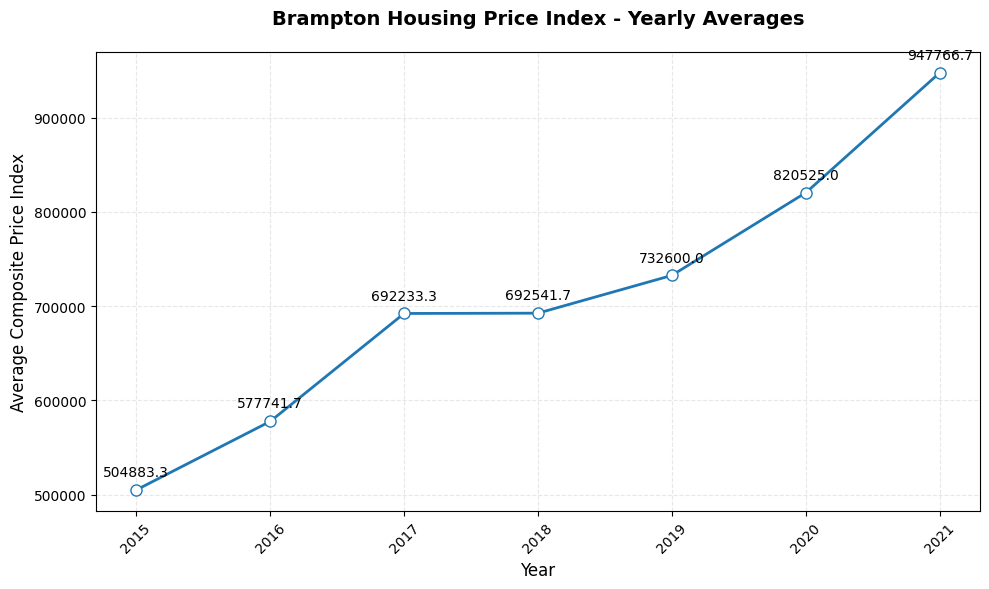

In [ ]:
consolidate_and_plot_yearly(df)